In [1]:
from astropy.table import Table, vstack, Column
from tqdm import tqdm
from astropy.stats import bootstrap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import astropy.units as u
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib.lines import Line2D
import warnings

In [2]:
decals_raw = Table.read('GalfitM_DECALS_195.csv', format='ascii')
decals = decals_raw[decals_raw['type'] != 'PSF']

control_sample = Table.read('GalfitM_DECALS_Control_Sample_full.csv', format='ascii')

# Convertir la tabla de astropy a un DataFrame de pandas
df = decals.to_pandas()

# Reemplazar valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir de nuevo el DataFrame a una tabla de astropy
decals = Table.from_pandas(df)

In [3]:
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    decals['n_' + filtro] = pd.to_numeric(decals['n_' + filtro], errors='coerce')
    decals['RE_' +filtro] = pd.to_numeric(decals['RE_' + filtro], errors = 'coerce')
    decals['e_n_' + filtro] = pd.to_numeric(decals['e_n_' + filtro], errors='coerce')
    decals['e_RE_' +filtro] = pd.to_numeric(decals['e_RE_' + filtro], errors = 'coerce')
    control_sample['n_' + filtro] = pd.to_numeric(control_sample['n_' + filtro], errors='coerce')
    control_sample['RE_' +filtro] = pd.to_numeric(control_sample['RE_' + filtro], errors = 'coerce')
    control_sample['e_n_' + filtro] = pd.to_numeric(control_sample['e_n_' + filtro], errors='coerce')
    control_sample['e_RE_' +filtro] = pd.to_numeric(control_sample['e_RE_' + filtro], errors = 'coerce')

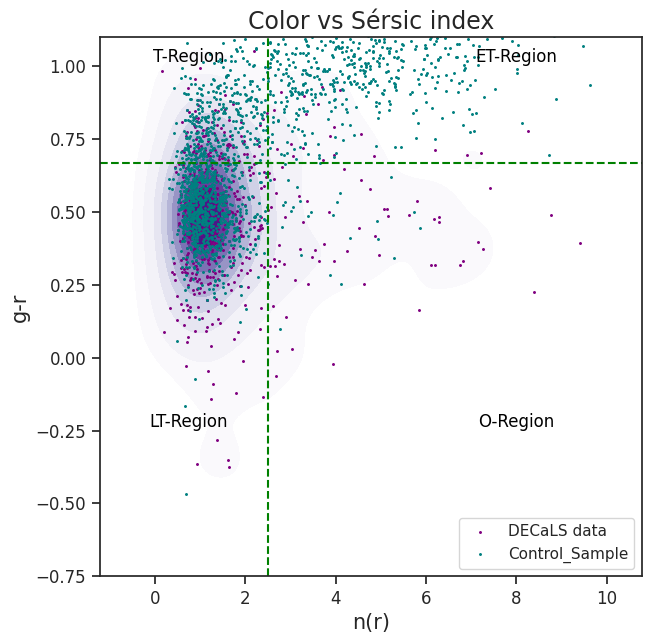

NameError: name 'cmap' is not defined

In [37]:
decals_no_zero = decals[decals['n_r']!=0.0]
g_r_decals = decals_no_zero['mag_g'] - decals_no_zero['mag_r']
n_r = decals_no_zero['n_r']
cs_no_zero = control_sample[control_sample['n_r'] != 0.0]
g_r_cs = cs_no_zero['mag_g'] - cs_no_zero['mag_r']
n_r_cs = cs_no_zero['n_r']
plt.figure(figsize=(7, 7))

sns.kdeplot(x=n_r, y=g_r_decals, cmap='Purples', shade=True, cbar=False)
#sns.kdeplot(x=n_r_cs, y=g_r_cs, cmap='Oranges', shade=True, cbar=False)

plt.scatter(decals_no_zero['n_r'], g_r_decals, marker='.', label='DECaLS data', s=5, color='purple')
plt.scatter(cs_no_zero['n_r'], g_r_cs, marker='.', label='Control_Sample', s=5, color='teal')

plt.ylim(-0.75, 1.1)
#plt.xlim(0, )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Color vs Sérsic index', size=17)
plt.xlabel('n(r)', size=15)
plt.ylabel('g-r', size=15)
# Añadir una línea horizontal en y=50
plt.legend(loc='lower right')
plt.axhline(y=0.67, color='green', linestyle='--')

# Añadir una línea vertical en x=5
plt.axvline(x=2.5, color='green', linestyle='--')

# Agregar texto en coordenadas específicas
plt.text(0.75, 1, 'T-Region', fontsize=12, ha='center', va='bottom', color='black')
plt.text(0.75, -0.25, 'LT-Region', fontsize=12, ha='center', va='bottom', color='black')
plt.text(8, 1, 'ET-Region', fontsize=12, ha='center', va='bottom', color='black')
plt.text(8, -0.25, 'O-Region', fontsize=12, ha='center', va='bottom', color='black')

plt.show()


In [5]:
sfr_decals = Table.read('sfr_decals_2.csv', format='ascii')
sfr_decals.rename_column('log(M_stellar)', 'stellar_mass')
sfr_decals.rename_column('logSFR_NUV', 'log_SFR')
sfr_decals.rename_column('zmemb', 'z')

type_column = Column(['SFCG Galaxy'] * len(sfr_decals), name='Nature')
sfr_decals.add_column(type_column)
sfr_decals

<Table length=467>
Group  Gal     z             ra         ...   mag_i     mag_z      Nature  
int64 int64 float64       float64       ...  float64   float64     str11   
----- ----- -------- ------------------ ... --------- --------- -----------
    2     1 0.018646 0.3129815262621921 ...        --  15.47638 SFCG Galaxy
    2     4 0.018646 0.3732407814035215 ...        -- 16.937862 SFCG Galaxy
    3     2 0.041719  2.837759217243158 ... 17.369955    17.241 SFCG Galaxy
    3     3 0.041719  2.842623280146343 ... 18.444674 18.396204 SFCG Galaxy
    3     1 0.041719  2.834674521202194 ...  18.81202 18.714947 SFCG Galaxy
    3     4 0.041719  2.852407391719842 ... 14.492288 14.339665 SFCG Galaxy
   10     4 0.051799  5.687584604767833 ... 15.386818  15.19269 SFCG Galaxy
   10     1 0.051799  5.653417994681938 ...  17.66007 17.574535 SFCG Galaxy
   10     3 0.051799  5.674201525891037 ... 17.452723  17.32738 SFCG Galaxy
  ...   ...      ...                ... ...       ...       ...         ...
  275     1 0.085591  230.4859506655617 ...        -- 16.328924 SFCG Galaxy
  275     3 0.085591  230.4942925098584 ...        -- 17.596764 SFCG Galaxy
  275     2 0.085591  230.4894316259802 ...        -- 17.321753 SFCG Galaxy
  275     5   0.0839  230.4983913571461 ...        -- 16.080303 SFCG Galaxy
  279     6 0.099919  196.8375094825033 ... 16.058962 15.779421 SFCG Galaxy
  279     3 0.100102  196.8031051256991 ... 17.204063 17.017136 SFCG Galaxy
  279     2 0.027162  196.7985132163119 ... 15.893824  15.77785 SFCG Galaxy
  279     4 0.026784  196.8227238777917 ... 15.248016 15.105432 SFCG Galaxy
  279     7 0.063226  196.8598710304953 ...  16.26588 16.096516 SFCG Galaxy
  279     1 0.099919  196.7951346691029 ... 21.061552 21.004063 SFCG Galaxy

In [6]:
type_column_cs = Column(['Field Galaxy'] * len(control_sample), name='Nature')
control_sample.add_column(type_column_cs)

In [7]:
sfr_decals_plots = sfr_decals['Group', 'Gal', 'z', 'ra', 'dec', 'log_SFR', 'stellar_mass', 'RE_g', 'n_g', 'RE_r', 'n_r', 'RE_i', 'n_i', 'RE_z', 'n_z', 'Nature', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'e_n_r', 'e_RE_r']
control_sample_plots = control_sample['Group', 'Gal', 'z', 'ra', 'dec', 'log_SFR', 'stellar_mass', 'RE_g', 'n_g', 'RE_r', 'n_r', 'RE_i', 'n_i', 'RE_z', 'n_z', 'Nature', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'e_n_r', 'e_RE_r']

cg_cs = vstack([sfr_decals_plots, control_sample_plots])

In [8]:
cg_cs = cg_cs[cg_cs['log_SFR'] > -10]
cg_cs['log_sSFR'] = cg_cs['log_SFR'] - cg_cs['stellar_mass']
cg_cs['RE_g'] = cg_cs['RE_g']*0.262
cg_cs['RE_r'] = cg_cs['RE_r']*0.262
cg_cs['e_RE_r'] = cg_cs['e_RE_r']*0.262
cg_cs['RE_i'] = cg_cs['RE_i']*0.262
cg_cs['RE_z'] = cg_cs['RE_z']*0.262

cg_cs['Distance (Mpc)'] = 300000*cg_cs['z']/67.4
cg_cs['RE_g(kpc)'] = (cg_cs['RE_g']*cg_cs['Distance (Mpc)'])/206.265
cg_cs['RE_r(kpc)'] = (cg_cs['RE_r']*cg_cs['Distance (Mpc)'])/206.265
cg_cs['e_RE_r(kpc)'] = (cg_cs['e_RE_r']*cg_cs['Distance (Mpc)'])/206.265
cg_cs['RE_i(kpc)'] = (cg_cs['RE_i']*cg_cs['Distance (Mpc)'])/206.265
cg_cs['RE_z(kpc)'] = (cg_cs['RE_z']*cg_cs['Distance (Mpc)'])/206.265

In [9]:
cg_cs = cg_cs[cg_cs['RE_g(kpc)'] < 30]
print(np.nanmedian(cg_cs['RE_g(kpc)'][cg_cs['Nature'] == 'SFCG Galaxy']))
print(np.nanmedian(cg_cs['RE_g(kpc)'][cg_cs['Nature'] == 'Field Galaxy']))

4.6355394354853505
5.109094898304671


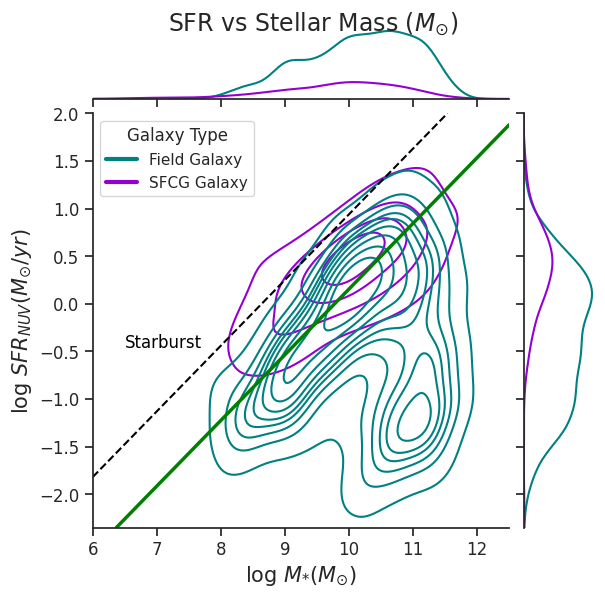

In [44]:
# Ignorar los warnings
warnings.filterwarnings("ignore")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}

sns.set_theme(style="ticks")
#sns.set_palette("pastel")
y=cg_cs['log_SFR']
x=cg_cs['stellar_mass']
sur=cg_cs['Nature']

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=cg_cs,
    x=x, y=y, hue=sur,
    kind="kde",
    fill=False,
    palette=custom_palette
    #alpha=0.6
)
# Añadir un título al gráfico
g.fig.suptitle("SFR vs Stellar Mass $(M_{\odot})$", fontsize=17)
g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga con el gráfico

# Añadir una recta que pase por el punto (x, y) = (0.25, 0.25)
g.ax_joint.axline((9, 0.25), slope=0.69, color='black', linestyle='--')
# Limitar los ejes
g.ax_joint.set_xlim(6, 12.5)
g.ax_joint.set_ylim(-2.35, 2)
g.ax_joint.text(6.5, -0.5, 'Starburst', color='black', fontsize=12, verticalalignment='bottom')
# Añadir una segunda recta continua con un label
g.ax_joint.axline((10.5, 0.5), slope=0.69, color='green', linestyle='-', label='Main sequence, Sargent+14', linewidth=2.5)
g.set_axis_labels("log $M_{*} (M_{\odot})$", "log $SFR_{NUV} (M_{\odot}/yr)$", fontsize=15)
g.ax_joint.tick_params(axis='both', labelsize=12)  # Cambia 12 por el tamaño de fuente deseado
# Mostrar la leyenda con el label de la recta continua
g.ax_joint.legend()

# Definir los handles y labels
handles = [Line2D([0], [0], color=custom_palette[name], lw=3) for name in custom_palette]
labels = list(custom_palette.keys())

# Añadir la leyenda al gráfico
g.ax_joint.legend(handles=handles, labels=labels, title="Galaxy Type", loc="upper left")

plt.show()

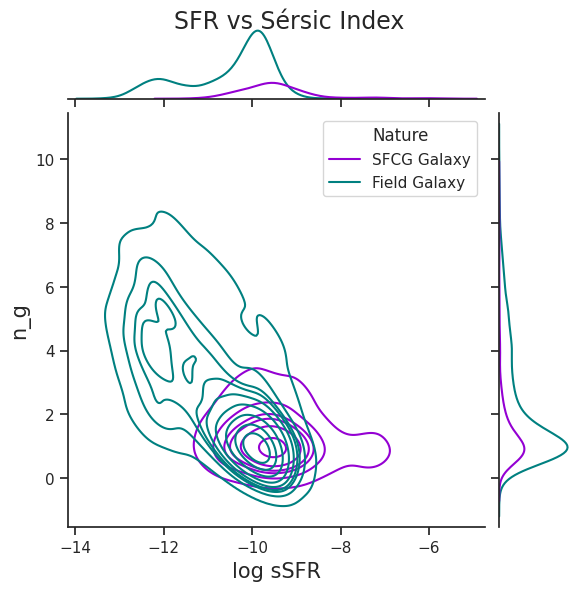

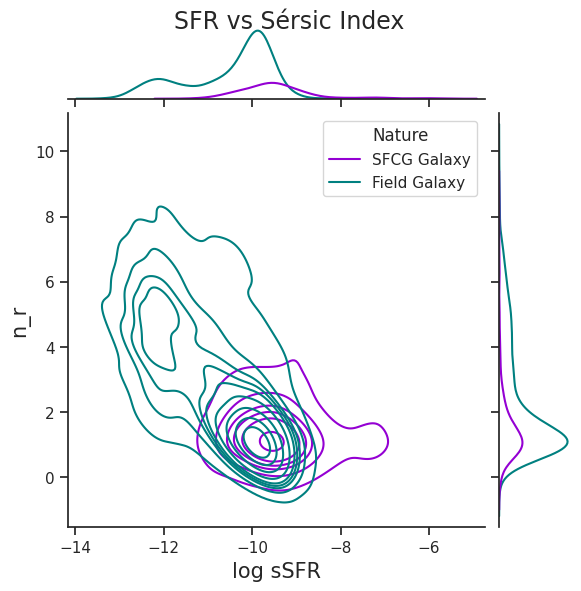

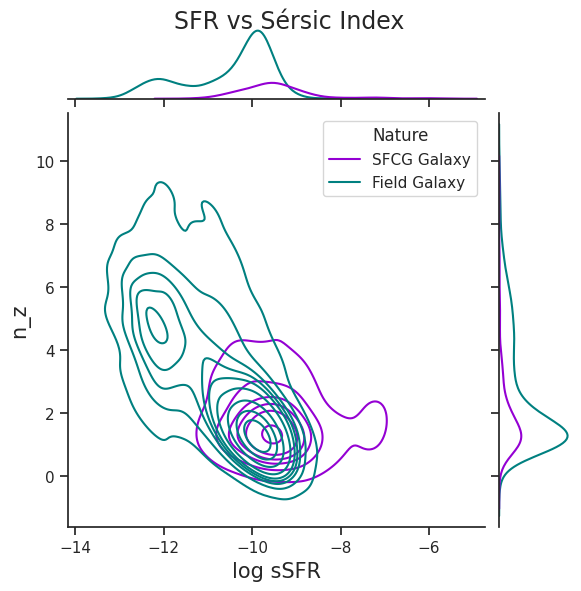

In [45]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}

# Definir los datos
x = cg_cs['log_sSFR']
sur = cg_cs['Nature']

# Lista de columnas que quieres graficar
y_columns = ['n_g', 'n_r', 'n_z']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col in y_columns:
    # Crear el gráfico
    g = sns.jointplot(
        data=cg_cs,
        x=x, y=cg_cs[col], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
    )
    
    # Añadir títulos
    g.set_axis_labels("log sSFR", f"{col}", fontsize=15)
    g.fig.suptitle(f"SFR vs Sérsic Index", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()


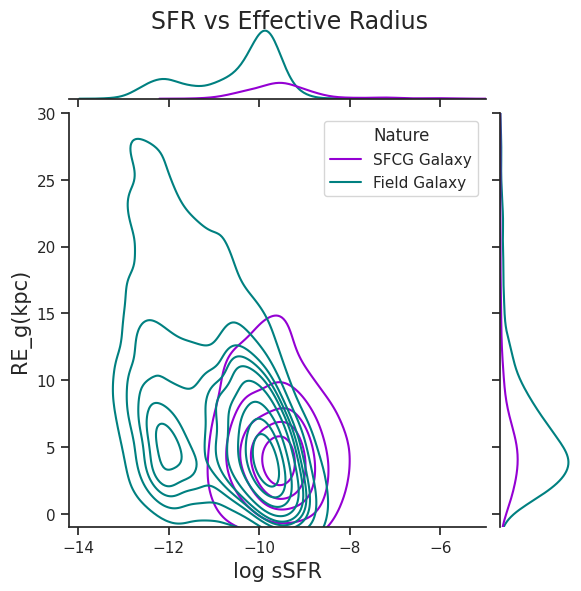

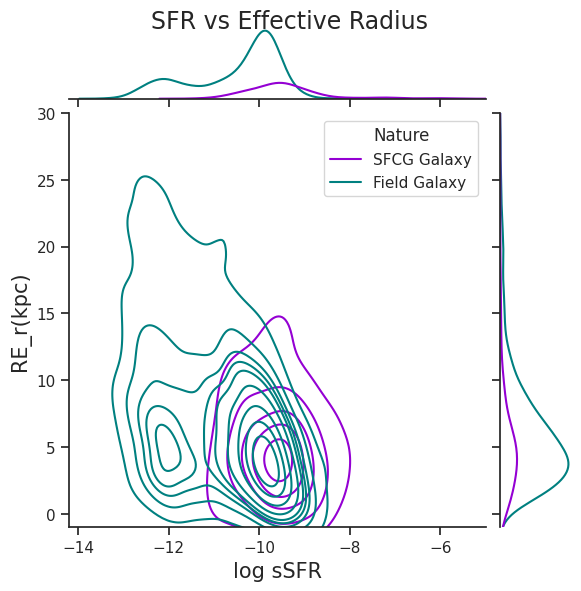

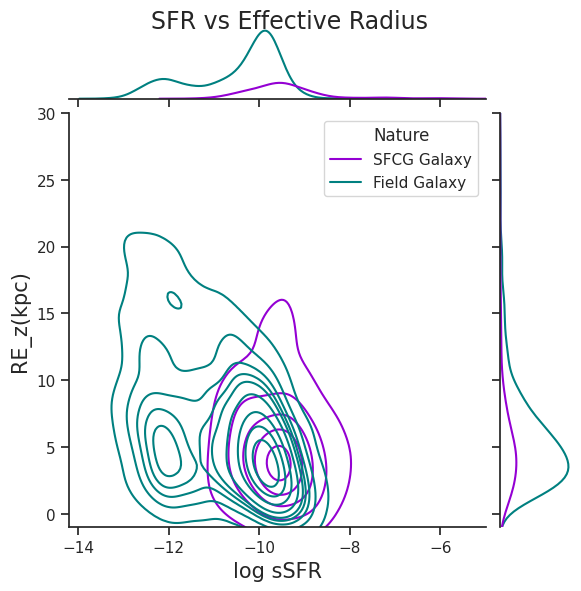

In [46]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}

# Definir los datos
x = cg_cs['log_sSFR']
sur = cg_cs['Nature']

# Lista de columnas que quieres graficar
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col in y_columns:
    # Crear el gráfico
    g = sns.jointplot(
        data=cg_cs,
        x=x, y=cg_cs[col], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
    )
    # Limitar los ejes
    g.ax_joint.set_xlim(-14.2, -5)
    g.ax_joint.set_ylim(-1, 30)
    # Añadir títulos
    g.set_axis_labels("log sSFR", f"{col}", fontsize=15)
    g.fig.suptitle(f"SFR vs Effective Radius", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

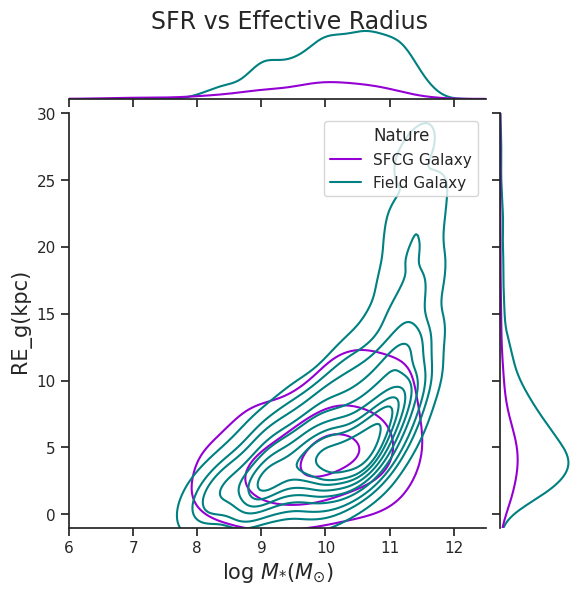

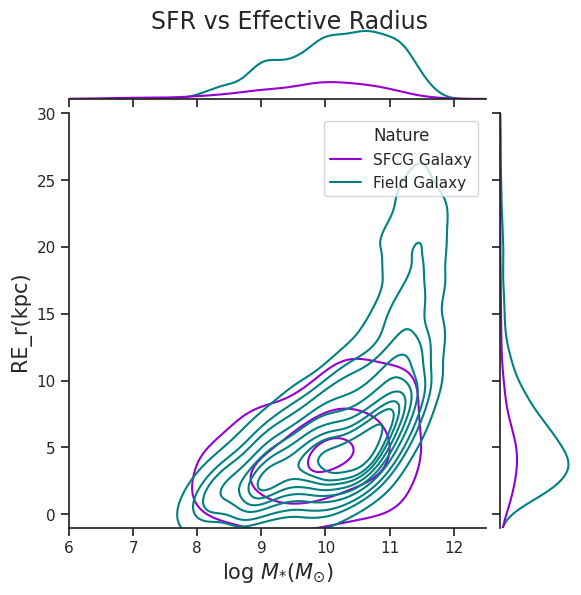

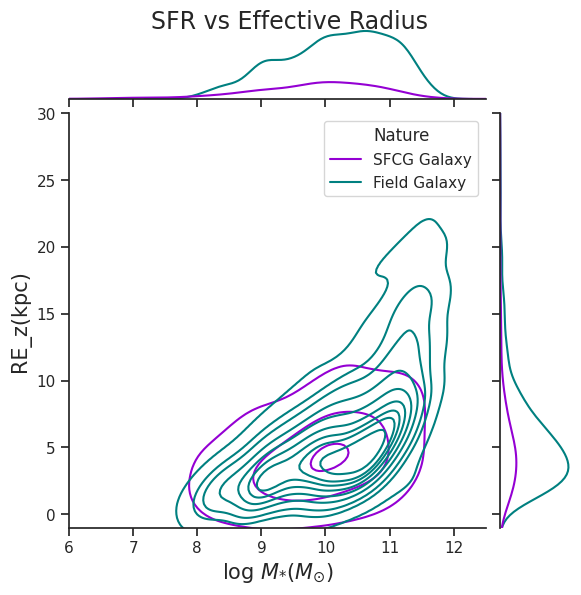

In [47]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}

# Definir los datos
x = cg_cs['stellar_mass']
sur = cg_cs['Nature']

# Lista de columnas que quieres graficar
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col in y_columns:
    # Crear el gráfico
    g = sns.jointplot(
        data=cg_cs,
        x=x, y=cg_cs[col], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
    )
    # Limitar los ejes
    g.ax_joint.set_xlim(6, 12.5)
    g.ax_joint.set_ylim(-1, 30)
    # Añadir títulos
    g.set_axis_labels("log $M_{*} (M_{\odot})$", f"{col}", fontsize=15)
    g.fig.suptitle(f"SFR vs Effective Radius", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

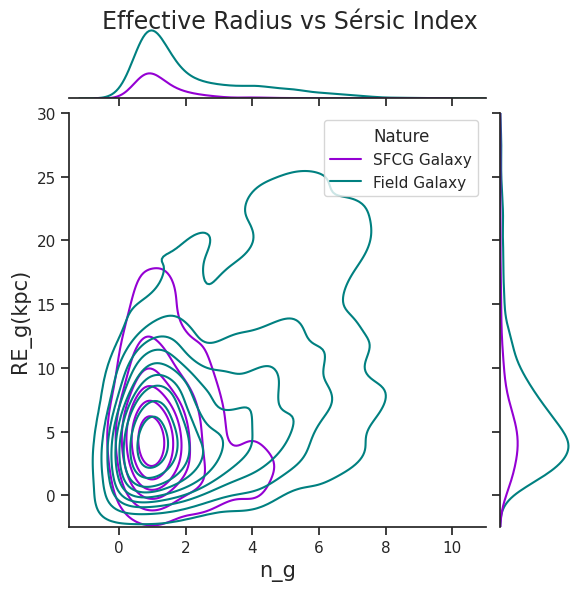

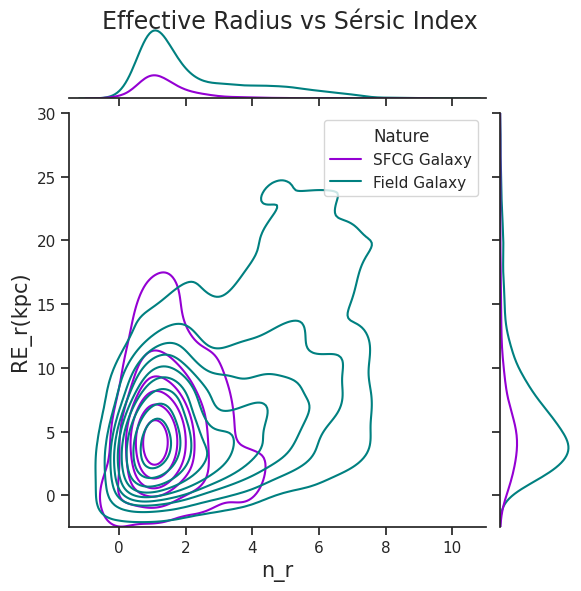

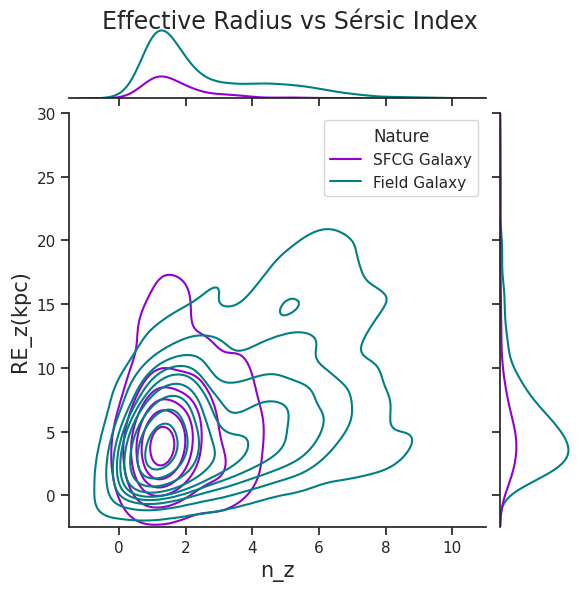

In [48]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = cg_cs['Nature']

# Lista de columnas que quieres graficar
x_columns = ['n_g', 'n_r', 'n_z']
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col_x, col_y in zip(x_columns, y_columns):
    # Crear el gráfico
    g = sns.jointplot(
        data=cg_cs,
        x=cg_cs[col_x], y=cg_cs[col_y], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
    )
    # Limitar los ejes
    g.ax_joint.set_xlim(-1.5, 11)
    g.ax_joint.set_ylim(-2.5, 30)
    # Añadir títulos
    g.set_axis_labels(f"{col_x}", f"{col_y}", fontsize=15)
    g.fig.suptitle(f"Effective Radius vs Sérsic Index", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

## Separar las galaxias por región en el plot de g-r vs n

In [15]:
late_type = cg_cs[((cg_cs['mag_g'] - cg_cs['mag_r']) < 0.67) & (cg_cs['n_r'] <= 2.5)]
transition = cg_cs[((cg_cs['mag_g'] - cg_cs['mag_r']) > 0.67) & (cg_cs['n_r'] <= 2.5)]
early_type = cg_cs[((cg_cs['mag_g'] - cg_cs['mag_r']) > 0.67) & (cg_cs['n_r'] > 2.5)]
other = cg_cs[((cg_cs['mag_g'] - cg_cs['mag_r']) < 0.67) & (cg_cs['n_r'] > 2.5)]
print(len(late_type), len(transition), len(early_type), len(other))
transition = transition[(transition['n_r'] != 0.0) & (transition['RE_r(kpc)'] != 0.0)]

1095 432 518 66


[[ 3.28638498 30.14354067]
 [71.12676056 47.36842105]
 [16.90140845 20.75358852]
 [ 8.68544601  1.73444976]]


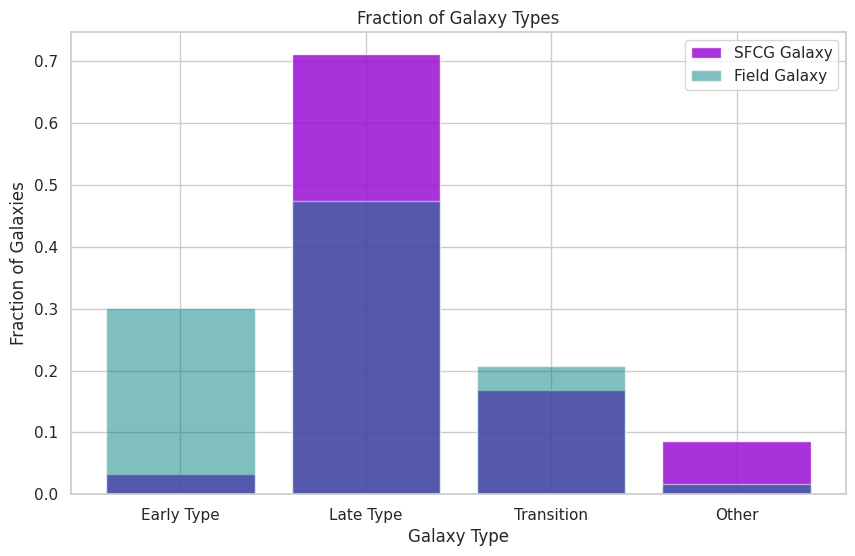

In [49]:
sns.set_theme(style='whitegrid')

tabla_names = ['Early Type', 'Late Type', 'Transition', 'Other']

tablas = [early_type, late_type, transition, other]

# Contar el total de galaxias por 'Nature' en todas las tablas
total_sfcg = 0
total_field = 0
for tabla in tablas:
    total_sfcg += np.sum(tabla['Nature'] == 'SFCG Galaxy')
    total_field += np.sum(tabla['Nature'] == 'Field Galaxy')

# Crear una lista para almacenar las fracciones para cada tabla
fractions = []
for tabla in tablas:
    sf_galaxies = np.sum(tabla['Nature'] == 'SFCG Galaxy')
    field_galaxies = np.sum(tabla['Nature'] == 'Field Galaxy')
    
    # Calcular la fracción respecto al total
    sf_fraction = sf_galaxies / total_sfcg
    field_fraction = field_galaxies / total_field
    
    # Añadir las fracciones a la lista
    fractions.append([sf_fraction, field_fraction])

# Convertir los resultados en un array de numpy
fractions = np.array(fractions)
print(fractions*100)
# Crear el histograma apilado
fig, ax = plt.subplots(figsize=(10, 6))

# Definir las posiciones de los bins (uno para cada tabla)
bins = np.arange(len(tabla_names))

bar1 = ax.bar(bins, fractions[:, 0], alpha = 0.8, label='SFCG Galaxy', color='darkviolet')
bar2 = ax.bar(bins, fractions[:, 1], alpha = 0.5, label='Field Galaxy', color='teal')

ax.set_xticks(bins)
ax.set_xticklabels(tabla_names)
ax.set_xlabel('Galaxy Type')
ax.set_ylabel('Fraction of Galaxies')
ax.set_title('Fraction of Galaxy Types')
ax.legend()

plt.show()

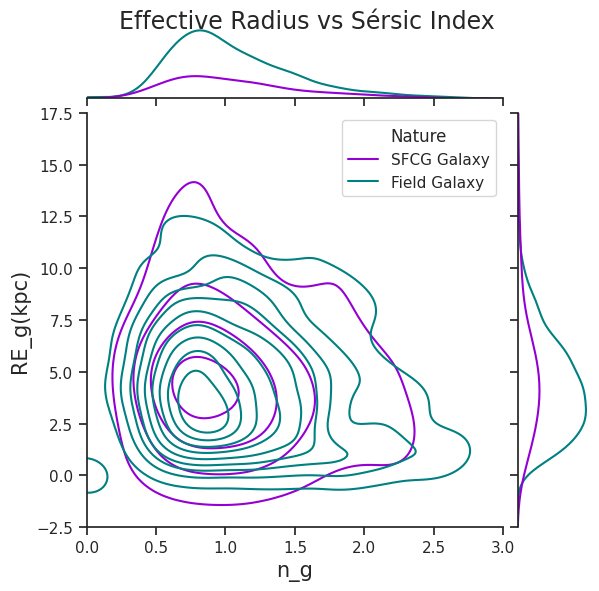

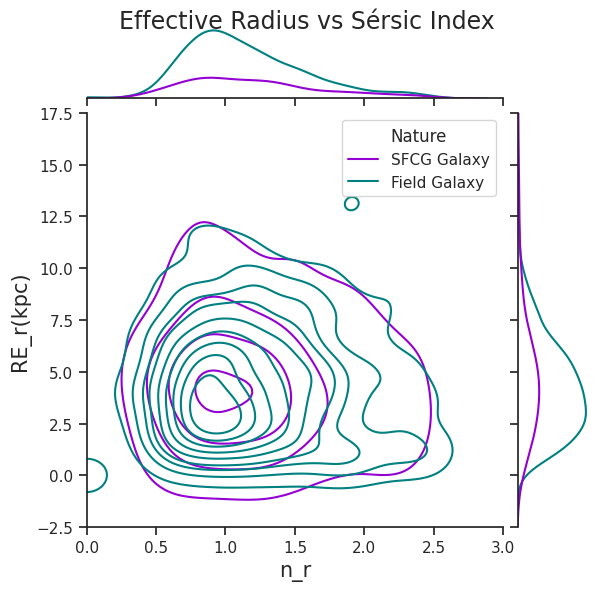

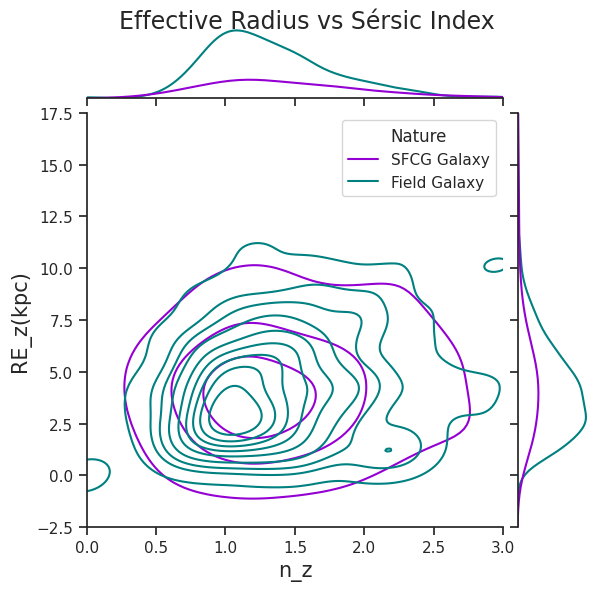

In [50]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = late_type['Nature']

# Lista de columnas que quieres graficar
x_columns = ['n_g', 'n_r', 'n_z']
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Crear el gráfico
for col_x, col_y in zip(x_columns, y_columns):    
    g = sns.jointplot(
        data=late_type,
        x=late_type[col_x], y=late_type[col_y], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
        )
    # Limitar los ejes
    g.ax_joint.set_xlim(0, 3)
    g.ax_joint.set_ylim(-2.5, 17.5)
    # Añadir títulos
    g.set_axis_labels(f"{col_x}", f"{col_y}", fontsize=15)
    g.fig.suptitle(f"Effective Radius vs Sérsic Index", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

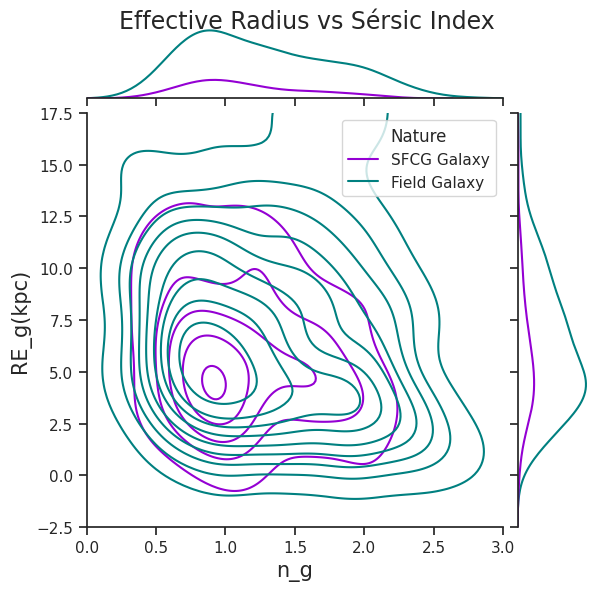

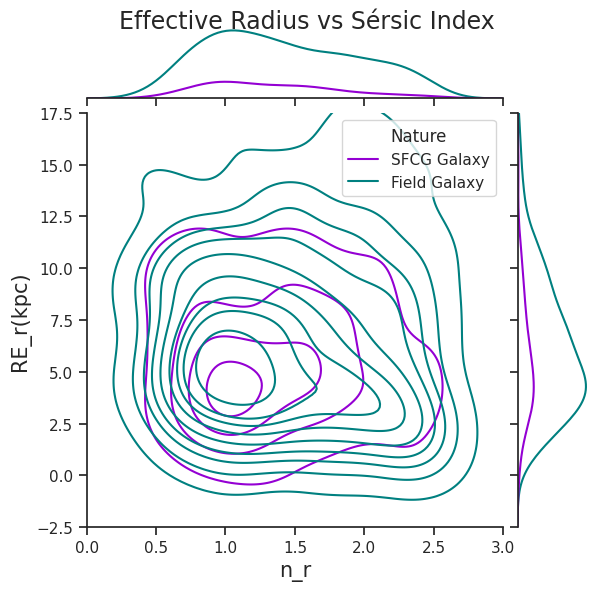

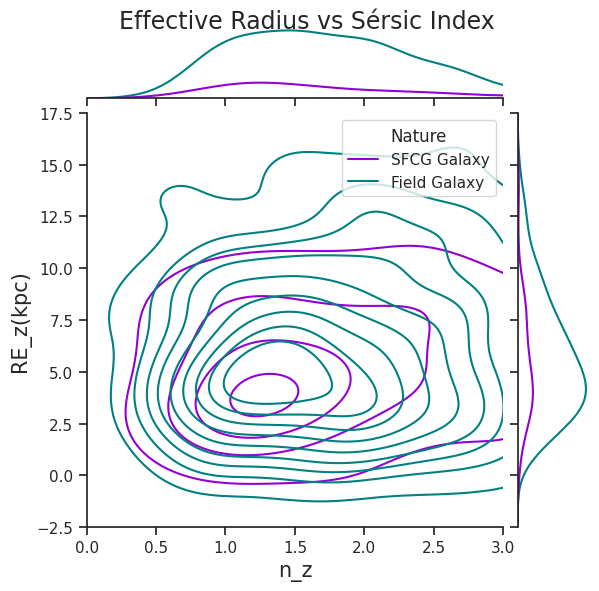

In [51]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = transition['Nature']

# Lista de columnas que quieres graficar
x_columns = ['n_g', 'n_r', 'n_z']
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Crear el gráfico
for col_x, col_y in zip(x_columns, y_columns):    
    g = sns.jointplot(
        data=transition,
        x=transition[col_x], y=transition[col_y], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
        )
    # Limitar los ejes
    g.ax_joint.set_xlim(0, 3)
    g.ax_joint.set_ylim(-2.5, 17.5)
    # Añadir títulos
    g.set_axis_labels(f"{col_x}", f"{col_y}", fontsize=15)
    g.fig.suptitle(f"Effective Radius vs Sérsic Index", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

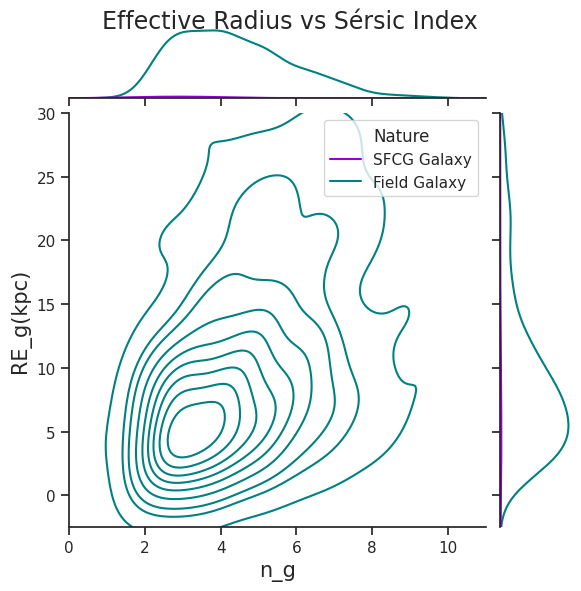

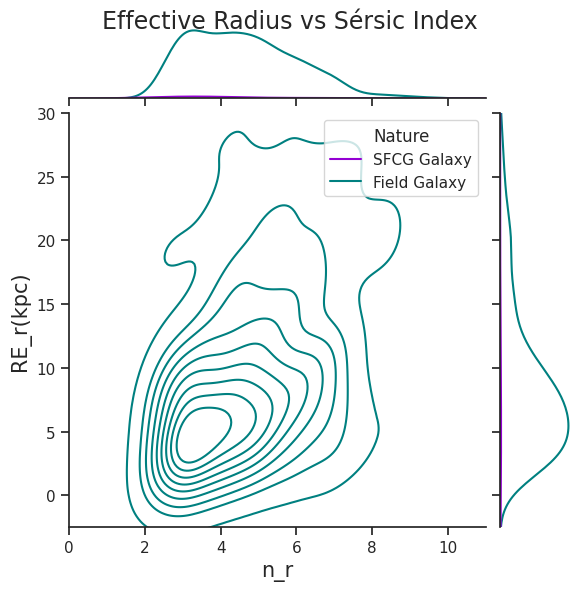

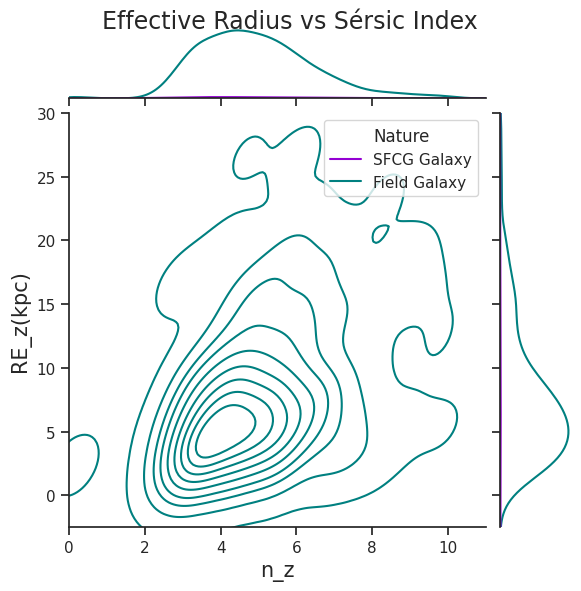

In [52]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = early_type['Nature']

# Lista de columnas que quieres graficar
x_columns = ['n_g', 'n_r', 'n_z']
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Crear el gráfico
for col_x, col_y in zip(x_columns, y_columns):    
    g = sns.jointplot(
        data=early_type,
        x=early_type[col_x], y=early_type[col_y], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # No llenar las curvas
        palette=custom_palette
        )
    # Limitar los ejes
    g.ax_joint.set_xlim(0, 11)
    g.ax_joint.set_ylim(-2.5, 30)
    # Añadir títulos
    g.set_axis_labels(f"{col_x}", f"{col_y}", fontsize=15)
    g.fig.suptitle(f"Effective Radius vs Sérsic Index", fontsize=17)  # Título principal
    g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

    # Mostrar el gráfico
    plt.show()

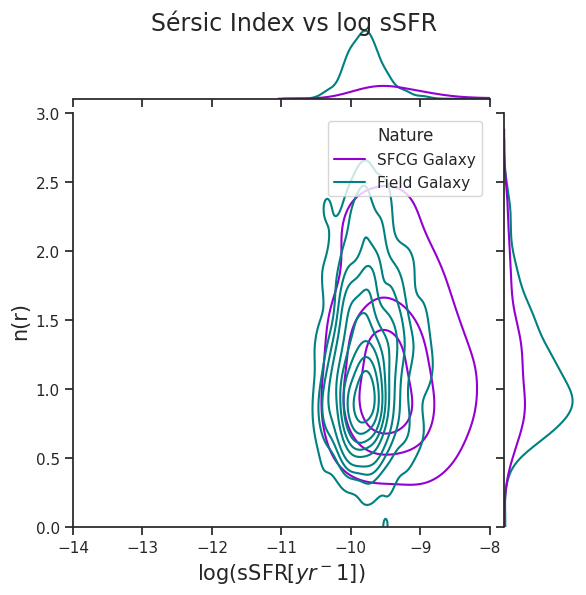

In [53]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = late_type['Nature']

# Lista de columnas que quieres graficar
x = late_type['log_sSFR']
y = late_type['n_r']
# Crear el gráfico
g = sns.jointplot(
    data=late_type,
    x=x, y=y, hue=sur,
    kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
    fill=False,  # No llenar las curvas
    palette=custom_palette
    )
# Limitar los ejes
g.ax_joint.set_xlim(-14, -8)
g.ax_joint.set_ylim(0, 3)
# Añadir títulos
g.set_axis_labels(f"log(sSFR[$yr^{-1}$])", f"n(r)", fontsize=15)
g.fig.suptitle(f"Sérsic Index vs log sSFR", fontsize=17)  # Título principal
g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

# Mostrar el gráfico
plt.show()

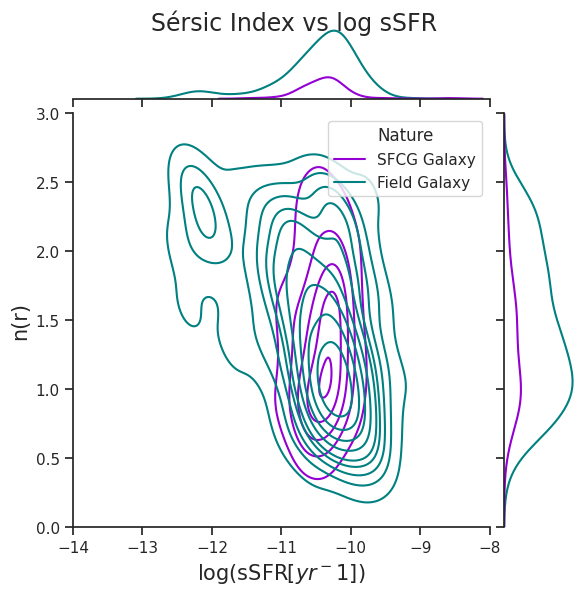

In [54]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = transition['Nature']

# Lista de columnas que quieres graficar
x = transition['log_sSFR']
y = transition['n_r']
# Crear el gráfico
g = sns.jointplot(
    data=late_type,
    x=x, y=y, hue=sur,
    kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
    fill=False,  # No llenar las curvas
    palette=custom_palette
    )
# Limitar los ejes
g.ax_joint.set_xlim(-14, -8)
g.ax_joint.set_ylim(0, 3)
# Añadir títulos
g.set_axis_labels(f"log(sSFR[$yr^{-1}$])", f"n(r)", fontsize=15)
g.fig.suptitle(f"Sérsic Index vs log sSFR", fontsize=17)  # Título principal
g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

# Mostrar el gráfico
plt.show()

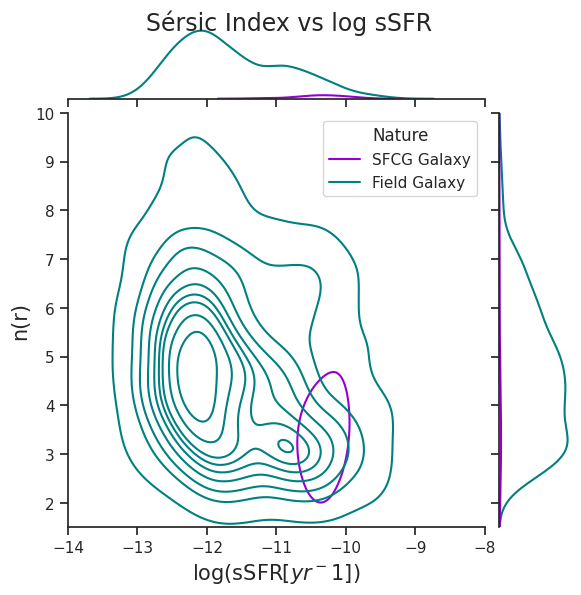

In [55]:
# Ignorar los warnings
warnings.filterwarnings("ignore")

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
custom_palette = {'Field Galaxy': 'teal', 'SFCG Galaxy': 'darkviolet'}


sur = early_type['Nature']

# Lista de columnas que quieres graficar
x = early_type['log_sSFR']
y = early_type['n_r']
# Crear el gráfico
g = sns.jointplot(
    data=early_type,
    x=x, y=y, hue=sur,
    kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
    fill=False,  # No llenar las curvas
    palette=custom_palette
    )
# Limitar los ejes
g.ax_joint.set_xlim(-14, -8)
g.ax_joint.set_ylim(1.5, 10)
# Añadir títulos
g.set_axis_labels(f"log(sSFR[$yr^{-1}$])", f"n(r)", fontsize=15)
g.fig.suptitle(f"Sérsic Index vs log sSFR", fontsize=17)  # Título principal
g.fig.subplots_adjust(top=0.95)  # Ajustar para que el título no se superponga

# Mostrar el gráfico
plt.show()

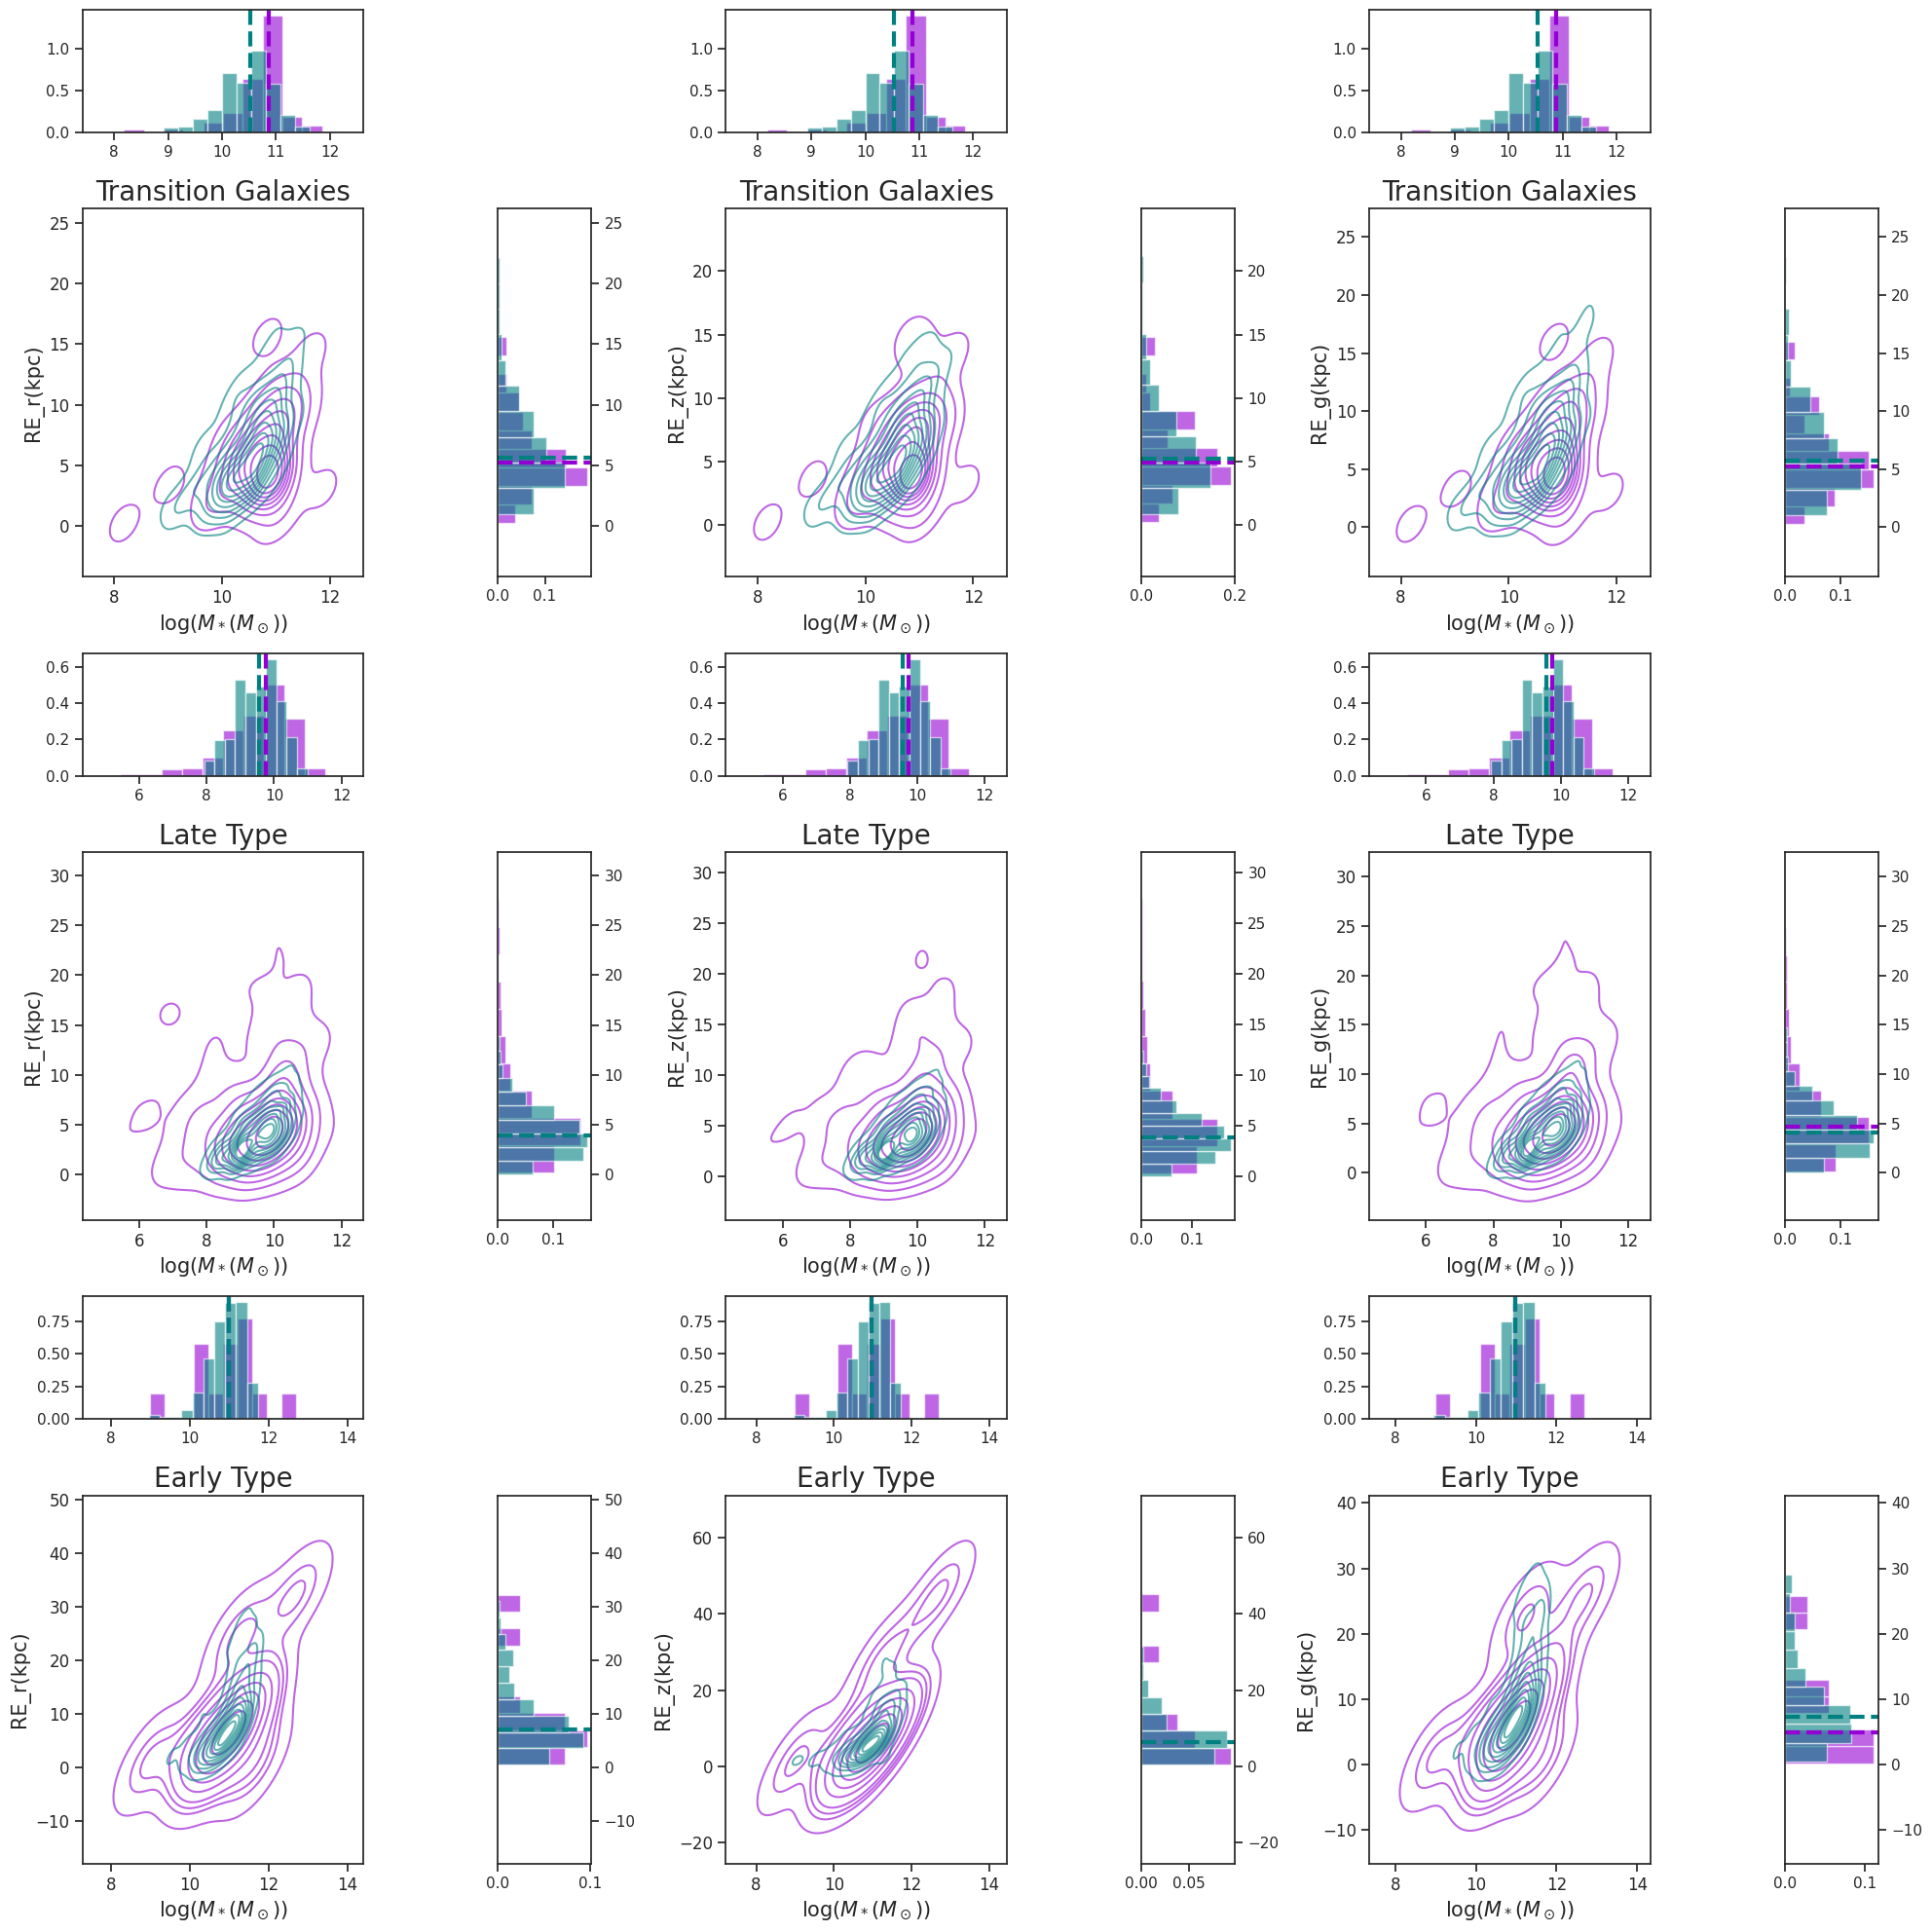

In [43]:
# Diccionario con los tipos de galaxias
galaxy_types = {'Early Type': early_type, 'Transition Galaxies': transition, 'Late Type': late_type}

# Colores para los dos tipos de galaxias
color_map = {'SFCG Galaxy': 'darkviolet', 'Field Galaxy': 'teal'}

# Figuras y ejes
fig, axs = plt.subplots(6, 6, figsize=(20, 20), gridspec_kw={'width_ratios': [6, 2, 6, 2, 6, 2], 'height_ratios': [2, 6, 2, 6, 2, 6]})

# Iterar sobre cada tipo de galaxia y cada columna de Re (g, r, z)
for i, (name, data) in enumerate(galaxy_types.items()):
    for j, re_col in enumerate(['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']):
        ax = axs[2*i-1, 2*j-2]
        ax_histx = axs[2*i-2, 2*j-2] #Panel del histograma en x
        ax_histy = axs[2*i-1, 2*j-1] #Panel del histograma en y
        

        ax.set_title(f'{name}', size=20)
        # Dividir los datos por Nature
        for nature_type, color in color_map.items():
            subset = data[data['Nature'] == nature_type]
            
            #Graficando KDE
            kde_plot = sns.kdeplot(x=subset['stellar_mass'], y=subset[re_col], ax=ax, fill=False, color=color, alpha = 0.6, label=nature_type)
            
            # Calcular medianas
            median_x = np.median(subset['stellar_mass'])
            median_y = np.median(subset[re_col])
            
            #Histogramas
            ax_histx.hist(subset['stellar_mass'], bins=10, color=color, alpha=0.6, density=True)
            ax_histy.hist(subset[re_col], bins=10, color=color, alpha=0.6, orientation='horizontal', density=True)
        
            # Añadir líneas de la mediana
            ax_histx.axvline(median_x, color=color, linestyle='--', linewidth=3)
            ax_histy.axhline(median_y, color=color, linestyle='--', linewidth=3)
        
        # Personalización de ejes
        ax_histx.set_xlim(ax.get_xlim())
        ax_histy.set_ylim(ax.get_ylim())
        ax_histy.yaxis.set_label_position("left")
        ax_histy.yaxis.tick_right()
        # Etiquetas personalizadas de los ejes
        ax.set_xlabel(f'log($M_*(M_\odot)$)', size=15)
        ax.set_ylabel(f'{re_col}', size=15)
        # Cambiar el tamaño de las etiquetas de los ticks
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        handles, labels = ax.get_legend_handles_labels()
        #ax.legend(handles, labels, title='Galaxy Type', loc='upper left')
# Eliminar los ejes innecesarios (las filas 1, 3 y 5, columnas 2, 4 y 6)
for i in [0, 2, 4]:
    for j in [1, 3, 5]:
        axs[i, j].set_visible(False)
# Configuración global
plt.tight_layout()
#plt.subplots_adjust(wspace=0.2)  # Reducir espacios entre subplots

plt.show()

In [56]:
median_re_late_sfcg = np.nanmedian(late_type['RE_r(kpc)'][late_type['Nature'] == 'SFCG Galaxy'])
median_error_re_late_sfcg = np.nanmedian(late_type['e_RE_r(kpc)'][late_type['Nature'] == 'SFCG Galaxy'])
median_re_transition_sfcg = np.nanmedian(transition['RE_r(kpc)'][transition['Nature'] == 'SFCG Galaxy'])
median_error_re_transition_sfcg = np.nanmedian(transition['e_RE_r(kpc)'][transition['Nature'] == 'SFCG Galaxy'])
median_re_early_sfcg = np.nanmedian(early_type['RE_r(kpc)'][early_type['Nature'] == 'SFCG Galaxy'])
median_error_re_early_sfcg = np.nanmedian(early_type['e_RE_r(kpc)'][early_type['Nature'] == 'SFCG Galaxy'])

median_re_late_cs = np.nanmedian(late_type['RE_r(kpc)'][late_type['Nature'] == 'Field Galaxy'])
median_error_re_late_cs = np.nanmedian(late_type['e_RE_r(kpc)'][late_type['Nature'] == 'Field Galaxy'])
median_re_transition_cs = np.nanmedian(transition['RE_r(kpc)'][transition['Nature'] == 'Field Galaxy'])
median_error_re_transition_cs = np.nanmedian(transition['e_RE_r(kpc)'][transition['Nature'] == 'Field Galaxy'])
median_re_early_cs = np.nanmedian(early_type['RE_r(kpc)'][early_type['Nature'] == 'Field Galaxy'])
median_error_re_early_cs = np.nanmedian(early_type['e_RE_r(kpc)'][early_type['Nature'] == 'Field Galaxy'])

median_n_late_sfcg = np.nanmedian(late_type['n_r'][late_type['Nature'] == 'SFCG Galaxy'])
median_error_n_late_sfcg = np.nanmedian(late_type['e_n_r'][late_type['Nature'] == 'SFCG Galaxy'])
median_n_transition_sfcg = np.nanmedian(transition['n_r'][transition['Nature'] == 'SFCG Galaxy'])
median_error_n_transition_sfcg = np.nanmedian(transition['e_n_r'][transition['Nature'] == 'SFCG Galaxy'])
median_n_early_sfcg = np.nanmedian(early_type['n_r'][early_type['Nature'] == 'SFCG Galaxy'])
median_error_n_early_sfcg = np.nanmedian(early_type['e_n_r'][early_type['Nature'] == 'SFCG Galaxy'])

median_n_late_cs = np.nanmedian(late_type['n_r'][late_type['Nature'] == 'Field Galaxy'])
median_error_n_late_cs = np.nanmedian(late_type['e_n_r'][late_type['Nature'] == 'Field Galaxy'])
median_n_transition_cs = np.nanmedian(transition['n_r'][transition['Nature'] == 'Field Galaxy'])
median_error_n_transition_cs = np.nanmedian(transition['e_n_r'][transition['Nature'] == 'Field Galaxy'])
median_n_early_cs = np.nanmedian(early_type['n_r'][early_type['Nature'] == 'Field Galaxy'])
median_error_n_early_cs = np.nanmedian(early_type['e_n_r'][early_type['Nature'] == 'Field Galaxy'])

print(f'Median effective radius for late type SFCG galaxies: {median_re_late_sfcg} \u00B1 {median_error_re_late_sfcg}')
print(f'Median effective radius for late type Field galaxies: {median_re_late_cs} \u00B1 {median_error_re_late_cs}')

print(f'Median effective radius for transition SFCG galaxies: {median_re_transition_sfcg} \u00B1 {median_error_re_transition_sfcg}')
print(f'Median effective radius for transition Field galaxies: {median_re_transition_cs} \u00B1 {median_error_re_transition_cs}')

print(f'Median effective radius for early type SFCG galaxies: {median_re_early_sfcg} \u00B1 {median_error_re_early_sfcg}')
print(f'Median effective radius for early type Field galaxies: {median_re_early_cs} \u00B1 {median_error_re_early_cs}')

print(f'Median Sérsic Index for late type SFCG galaxies: {median_n_late_sfcg} \u00B1 {median_error_n_late_sfcg}')
print(f'Median Sérsic Index for late type Field galaxies: {median_n_late_cs} \u00B1 {median_error_n_late_cs}')

print(f'Median Sérsic Index for transition SFCG galaxies: {median_n_transition_sfcg} \u00B1 {median_error_n_transition_sfcg}')
print(f'Median Sérsic Index for transition Field galaxies: {median_n_transition_cs} \u00B1 {median_error_n_transition_cs}')

print(f'Median Sérsic Index for early type SFCG galaxies: {median_n_early_sfcg} \u00B1 {median_error_n_early_sfcg}')
print(f'Median Sérsic Index for early type Field galaxies: {median_n_early_cs} \u00B1 {median_error_n_early_cs}')


Median effective radius for late type SFCG galaxies: 4.557406079311847 ± 0.00442898868536564
Median effective radius for late type Field galaxies: 3.972832662183511 ± 0.0039604565041614454
Median effective radius for transition SFCG galaxies: 5.226633062122053 ± 0.005365233818441475
Median effective radius for transition Field galaxies: 5.608891448952081 ± 0.005651495105724169
Median effective radius for early type SFCG galaxies: 4.455231970526233 ± 0.008270473471905038
Median effective radius for early type Field galaxies: 7.061362836304109 ± 0.02255865848008464
Median Sérsic Index for late type SFCG galaxies: 1.1353 ± 0.0022
Median Sérsic Index for late type Field galaxies: 1.0562 ± 0.0019
Median Sérsic Index for transition SFCG galaxies: 1.24585 ± 0.00185
Median Sérsic Index for transition Field galaxies: 1.3208 ± 0.0024
Median Sérsic Index for early type SFCG galaxies: 3.5250000000000004 ± 0.0051
Median Sérsic Index for early type Field galaxies: 4.40765 ± 0.0128


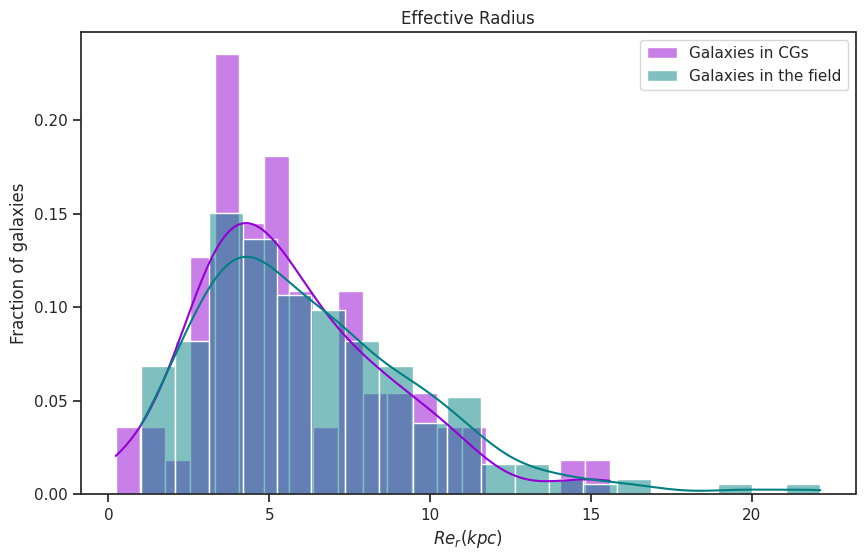

0.10943003522254242 0.43705661420801756


In [28]:
re_late_sfcg = transition['RE_r(kpc)'][transition['Nature'] == 'SFCG Galaxy']
re_late_cs = transition['RE_r(kpc)'][transition['Nature'] == 'Field Galaxy']

# Crear los histogramas con los mismos bordes de bins
plt.figure(figsize=(10, 6))
sns.histplot(re_late_sfcg, kde=True, stat='density', alpha=0.5, bins=20, color='darkviolet', label='Galaxies in CGs')
sns.histplot(re_late_cs, kde=True, stat='density', alpha=0.5, bins=20, color='teal', label='Galaxies in the field')

# Etiquetas y título
plt.xlabel('$Re_{r} (kpc)$')
plt.ylabel('Fraction of galaxies')
plt.title('Effective Radius')
plt.legend()

plt.show()

# Realizar el KS test
ks_stat, p_value = ks_2samp(re_late_sfcg, re_late_cs)
print(ks_stat, p_value)

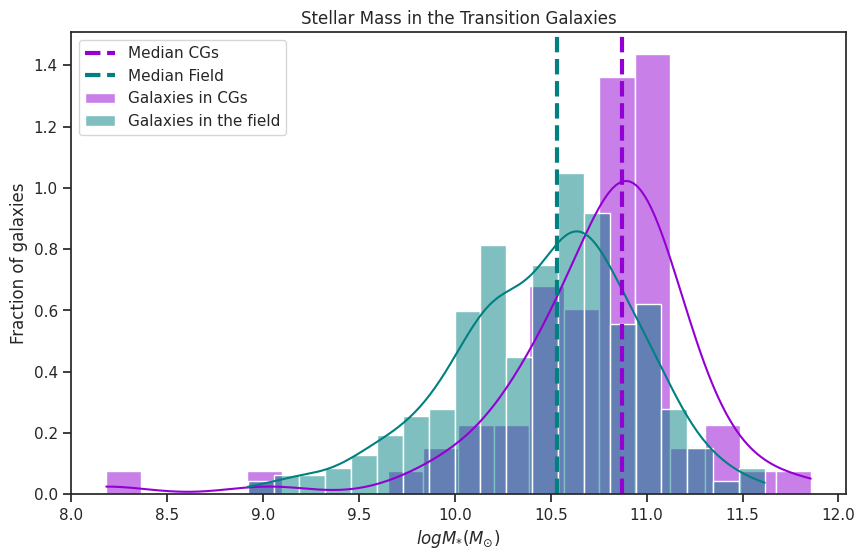

0.3580291386487352 2.4971267508428035e-07


In [32]:
mass_transition_sfcg = transition['stellar_mass'][transition['Nature'] == 'SFCG Galaxy']
mass_transition_cs = transition['stellar_mass'][transition['Nature'] == 'Field Galaxy']

# Crear los histogramas con los mismos bordes de bins
plt.figure(figsize=(10, 6))
sns.histplot(mass_transition_sfcg, kde=True, stat='density', alpha=0.5, bins=20, color='darkviolet', label='Galaxies in CGs')
sns.histplot(mass_transition_cs, kde=True, stat='density', alpha=0.5, bins=20, color='teal', label='Galaxies in the field')

# Calcular medianas
median_x = np.median(mass_transition_sfcg)
median_x_2 = np.median(mass_transition_cs)

# Añadir líneas de la mediana 
plt.axvline(median_x, color='darkviolet', linestyle='--', linewidth=3, label='Median CGs')
plt.axvline(median_x_2, color='teal', linestyle='--', linewidth=3, label='Median Field')

# Etiquetas y título
plt.xlabel('$log M_{*}(M_{\odot})$')
plt.ylabel('Fraction of galaxies')
plt.title('Stellar Mass in the Transition Galaxies')
plt.legend()

plt.show()

# Realizar el KS test
ks_stat, p_value = ks_2samp(mass_transition_sfcg, mass_transition_cs)
print(ks_stat, p_value)